In [ ]:
#all needed libraries
import pandas as pd
import numpy as np
from Ridge_regression import RidgeRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error          
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
import seaborn as sns


In [ ]:
#Q1
# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns for analysis
selected_columns = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
                    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
                    'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years',
                    'Income composition of resources', 'Schooling']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Split data into features (X) and target variable (y)
X = data_cleaned.drop(columns=['Life expectancy '])
y = data_cleaned['Life expectancy ']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict life expectancy on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get coefficients of the features
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Print coefficients of the features
print("Coefficients of predicting variables affecting life expectancy:")
print(coefficients)


In [ ]:
#Q2

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Filter countries with life expectancy < 65
low_life_expectancy = data[data['Life expectancy '] < 65]

# Split data into two groups based on healthcare expenditure
high_expenditure = low_life_expectancy[low_life_expectancy['Total expenditure'] >= low_life_expectancy['Total expenditure'].median()]
low_expenditure = low_life_expectancy[low_life_expectancy['Total expenditure'] < low_life_expectancy['Total expenditure'].median()]

# Perform t-test to compare life expectancy between high and low expenditure groups
t_stat, p_value = ttest_ind(high_expenditure['Life expectancy '], low_expenditure['Life expectancy '], equal_var=False)

# Determine significance level
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject null hypothesis: There is a significant difference in life expectancy between high and low expenditure groups."
else:
    conclusion = "Fail to reject null hypothesis: There is no significant difference in life expectancy between high and low expenditure groups."

print("T-statistic:", t_stat)
print("P-value:", p_value)
print(conclusion)

plt.scatter()


In [ ]:
#Q3

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy', 'Adult Mortality', 'infant deaths']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Define independent variables (infant deaths and adult mortality) and dependent variable (life expectancy)
X = data_cleaned[['Adult Mortality', 'infant deaths']]
y = data_cleaned['Life expectancy']

# Add constant to independent variables for regression intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


In [ ]:
#Q4

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy ', ' BMI ', 'Alcohol', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Calculate correlation matrix
correlation_matrix = data_cleaned.corr()

# Extract correlation coefficients with life expectancy
life_expectancy_correlation = correlation_matrix['Life expectancy ']

# Print correlation coefficients
print("Correlation with Life Expectancy:")
print(life_expectancy_correlation)


In [ ]:
#Q5

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy', 'Schooling']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Define independent variable (schooling) and dependent variable (life expectancy)
X = data_cleaned['Schooling']
y = data_cleaned['Life expectancy']

# Add constant to independent variable for regression intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()
# Print regression summary
#print(model.summary())

plt.figure()
sns.relplot(x='Schooling', y='Life expectancy', color = 'r', marker = 'o',kind='scatter',data=data_cleaned)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#Q6
# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy ', 'Alcohol']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Calculate correlation coefficient
correlation_coefficient = data_cleaned['Life expectancy '].corr(data_cleaned['Alcohol'])

# Print correlation coefficient
print("Correlation coefficient between Life Expectancy and Alcohol Consumption:", correlation_coefficient)


In [ ]:
#Q7
# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy', 'Population']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Calculate population density (population / area)
# If area information is available in the dataset, replace 'area' with the actual column name
# Otherwise, you can skip this step if population density is not directly available
#data_cleaned['Population Density'] = data_cleaned['Population'] / area

# Calculate correlation coefficient
correlation_coefficient = data_cleaned['Life expectancy'].corr(data_cleaned['Population Density'])

# Print correlation coefficient
print("Correlation coefficient between Life Expectancy and Population Density:", correlation_coefficient)


In [ ]:
#Q8
data = pd.read_csv('Life Expectancy Data.csv')
data=data.dropna()
Immunization_Factors = ['Polio','Diphtheria','Hepatitis B']
Immunization_data = data[Immunization_Factors]
model = LinearRegression()

y = data['Life expectancy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Immunization_data, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict life expectancy on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get coefficients of the features
coefficients = pd.DataFrame(model.coef_, index=Immunization_data.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Print coefficients of the features
print("Coefficients of predicting variables affecting life expectancy:")
print(coefficients)

In [ ]:
#Evaluation of the model

In [7]:
#Q3

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy', 'Adult Mortality', 'infant deaths']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Define independent variables (infant deaths and adult mortality) and dependent variable (life expectancy)
X = data_cleaned[['Adult Mortality', 'infant deaths']]
y = data_cleaned['Life expectancy']

# Add constant to independent variables for regression intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     1493.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:44:58   Log-Likelihood:                -9723.4
No. Observations:                2928   AIC:                         1.945e+04
Df Residuals:                    2925   BIC:                         1.947e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              78.2260      0.207    3

/Users/medoaljoudi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
#Q4

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy ', ' BMI ', 'Alcohol', ' HIV/AIDS', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Calculate correlation matrix
correlation_matrix = data_cleaned.corr()

# Extract correlation coefficients with life expectancy
life_expectancy_correlation = correlation_matrix['Life expectancy ']

# Print correlation coefficients
print("Correlation with Life Expectancy:")
print(life_expectancy_correlation)


Correlation with Life Expectancy:
Life expectancy                    1.000000
 BMI                               0.566617
Alcohol                            0.379419
 HIV/AIDS                         -0.571140
 thinness  1-19 years             -0.464997
 thinness 5-9 years               -0.459593
Income composition of resources    0.711432
Schooling                          0.745861
Name: Life expectancy , dtype: float64


/Users/medoaljoudi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<Figure size 432x288 with 0 Axes>

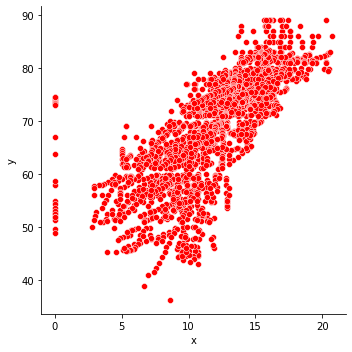

In [11]:
#Q5

# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy', 'Schooling']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Define independent variable (schooling) and dependent variable (life expectancy)
X = data_cleaned['Schooling']
y = data_cleaned['Life expectancy']

# Add constant to independent variable for regression intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()
# Print regression summary
#print(model.summary())

plt.figure()
sns.relplot(x='Schooling', y='Life expectancy', color = 'r', marker = 'o',kind='scatter',data=data_cleaned)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
## put a linear regression model then check performance

In [45]:
#Q6
# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy ', 'Alcohol']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Calculate correlation coefficient
correlation_coefficient = data_cleaned['Life expectancy '].corr(data_cleaned['Alcohol'])

# Print correlation coefficient
print("Correlation coefficient between Life Expectancy and Alcohol Consumption:", correlation_coefficient)


Correlation coefficient between Life Expectancy and Alcohol Consumption: 0.40487676112660204


In [55]:
#Q7
# Load the dataset
data = pd.read_csv('Life Expectancy Data.csv')

# Select relevant columns
selected_columns = ['Life expectancy', 'Population']

# Drop rows with missing values
data_cleaned = data[selected_columns].dropna()

# Calculate population density (population / area)
# If area information is available in the dataset, replace 'area' with the actual column name
# Otherwise, you can skip this step if population density is not directly available
#data_cleaned['Population Density'] = data_cleaned['Population'] / area

# Calculate correlation coefficient
correlation_coefficient = data_cleaned['Life expectancy'].corr(data_cleaned['Population Density'])

# Print correlation coefficient
print("Correlation coefficient between Life Expectancy and Population Density:", correlation_coefficient)


KeyError: 'Population Density'

In [6]:
#Q8
data = pd.read_csv('Life Expectancy Data.csv')
data=data.dropna()
Immunization_Factors = ['Polio','Diphtheria','Hepatitis B']
Immunization_data = data[Immunization_Factors]
model = LinearRegression()

y = data['Life expectancy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Immunization_data, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict life expectancy on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get coefficients of the features
coefficients = pd.DataFrame(model.coef_, index=Immunization_data.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Print coefficients of the features
print("Coefficients of predicting variables affecting life expectancy:")
print(coefficients)

Mean Squared Error: 62.031588516576385
Coefficients of predicting variables affecting life expectancy:
             Coefficient
Diphtheria      0.105742
Polio           0.070782
Hepatitis B    -0.007940


In [ ]:
#Evaluation of the model